## 哈希表总结
#### python中的哈希表结构包括set,dict,Count等
#### 哈希表的查询只需要O(1)时间复杂度，我们可以利用这个性质，简化一些程序的时间复杂度，类似的还有双指针，栈
#### 参考[代码随想录-哈希表](https://programmercarl.com/%E5%93%88%E5%B8%8C%E8%A1%A8%E7%90%86%E8%AE%BA%E5%9F%BA%E7%A1%80.html#%E5%93%88%E5%B8%8C%E8%A1%A8),[cs-note-哈希表](http://www.cyc2018.xyz/%E7%AE%97%E6%B3%95/Leetcode%20%E9%A2%98%E8%A7%A3/Leetcode%20%E9%A2%98%E8%A7%A3%20-%20%E5%93%88%E5%B8%8C%E8%A1%A8.html#_1-%E6%95%B0%E7%BB%84%E4%B8%AD%E4%B8%A4%E4%B8%AA%E6%95%B0%E7%9A%84%E5%92%8C%E4%B8%BA%E7%BB%99%E5%AE%9A%E5%80%BC)

### LC. 242 [有效的字母异位词](https://leetcode.cn/problems/valid-anagram/)
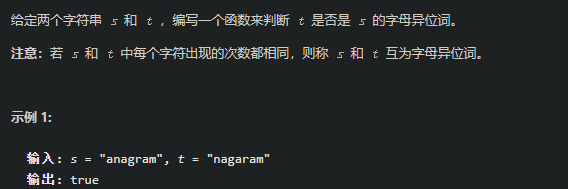

In [6]:
def lc242(s,t):
    dic = {}
    for s_ in s:
        dic[s_] = dic.get(s_,0) + 1
    for t_ in t:
        dic[t_] = dic.get(t_,0) - 1
    for d in dic:
        if dic[d] != 0:return False
    return True
s = "anagram";t = "nagaram"
lc242(s,t)

True

### LC. 349 [两个数组的交集](https://leetcode.cn/problems/intersection-of-two-arrays/)
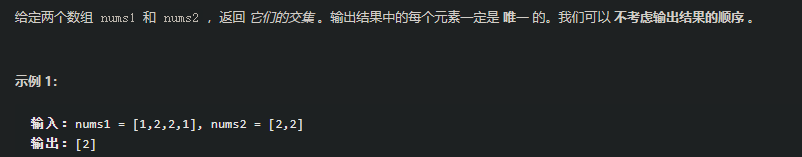

In [8]:
# 简单题
def lc349(nums1,nums2):
    res = []
    nums1,nums2 = set(nums1),set(nums2)
    dic = {}
    for n1 in nums1:
        dic[n1] = dic.get(n1,0) + 1

    for n2 in nums2:
        dic[n2] = dic.get(n2,0) - 1
        if dic[n2] == 0:
            res.append(n2)
    return res

nums1 = [4,9,5];nums2 = [9,4,9,8,4]
lc349(nums1,nums2)

[9, 4]

### LC. 202 [快乐数](https://leetcode.cn/problems/happy-number/)
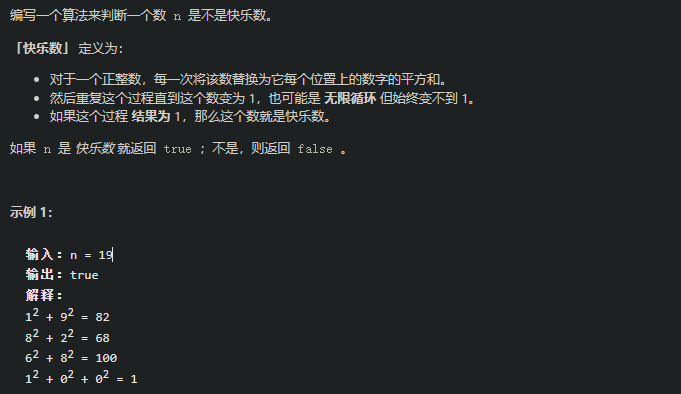

In [9]:
# 用一个set记录出现过的数，一旦计算出来的数存在与set中，那么肯定有环
def lc202(n):
    seen_num = set()
    # 计算每个n
    def count(n):
        res = 0
        while n > 0:
            n,num = n//10,n%10
            res += num**2
        return res

    while n != 1:
        n = count(n)
        if n not in seen_num:  # 查询只要O(1)的复杂度
            seen_num.add(n)
        else:
            return False
    return True
lc202(9)

False

### LC.383 [赎金信](https://leetcode.cn/problems/ransom-note/)
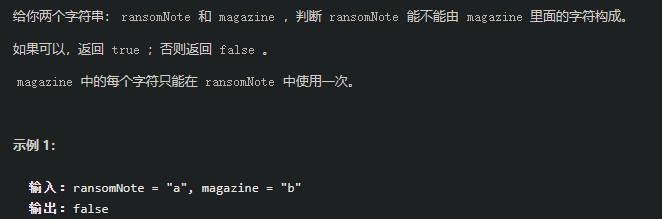

In [13]:
def lc383(ransomNote,magazine):
    dic = {}
    for r in ransomNote:
        dic[r] = dic.get(r,0) + 1
    for m in magazine:
        dic[m] = dic.get(m,0) - 1

    for d in dic:
        if dic[d] > 0:
            return False

    return True
lc383("aa","acba")

True

### LC. 217[存在重复元素](https://leetcode.cn/problems/contains-duplicate/description/)
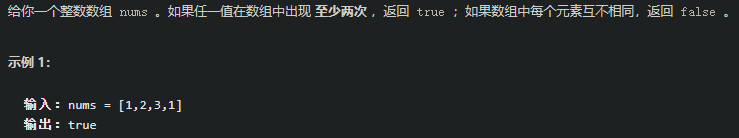

In [17]:
def lc217(nums):
    dic = {}
    for n in nums:
        dic[n] = dic.get(n,0) + 1
        if dic[n] > 1: return True
    return False
lc217([1,2,3,1])

True

### LC. 594[最长和谐子序列](https://leetcode.cn/problems/longest-harmonious-subsequence/)
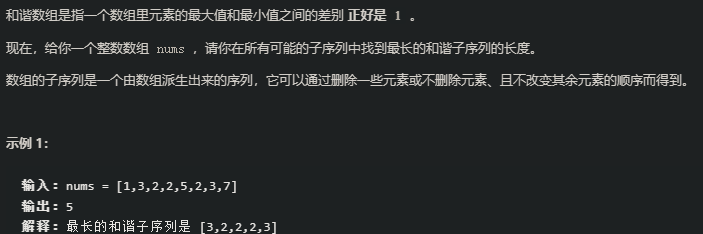

In [19]:
# 将数据记录到一个dict中，然后查询相差为1的有多少个就好了
def lc594(nums):
    # nums.sort()
    dic = {}
    res = 0
    for n in nums:
        dic[n] = dic.get(n,0)+1

    for d in dic:
        # 找相差1的
        if d-1 in dic:
            if dic[d] + dic[d-1] > res:
                    res = dic[d] + dic[d-1]
        if d+1 in dic:
            if dic[d] + dic[d+1] > res:
                    res = dic[d] + dic[d+1]
    return res
lc594([1,1,1,1,2,3,4,5,1,2,2,2])

9

### LC. 128 [最长连续子序列](https://leetcode.cn/problems/longest-consecutive-sequence/)
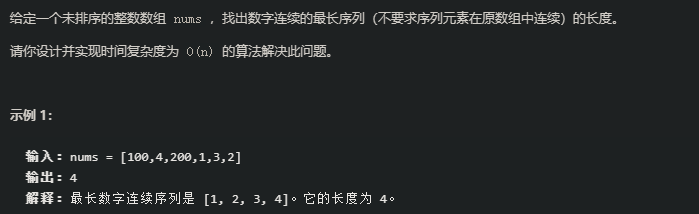

In [20]:
# hashmap查询的时间复杂度是O(1) - 真的很妙        # 法2：动态规划
def lc128(nums): 
    nums = set(nums)
    res = 0
    for n in nums:   # 这里不是n个哦，有多少段就是多少个
        if n-1 not in nums: # 能当起点的
            tmp = 1
            while n+1 in nums: # 看起来是O(n^2),实际上是O(n),因为每个串上的值只用了一次
                n += 1
                tmp += 1

            res = max(res,tmp)
    return res
lc128([100,4,200,1,3,2])

4

### LC. 1[两数之和](https://leetcode.cn/problems/two-sum/)
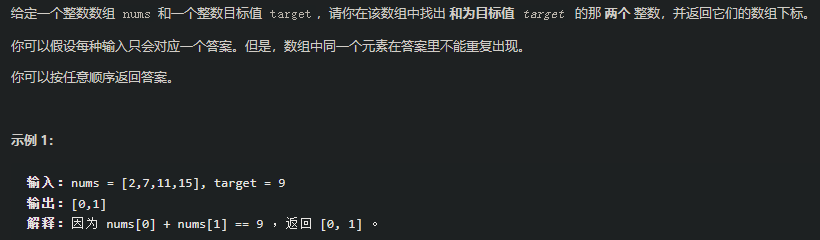

In [10]:
# hashmap经典题目
def lc1(nums,target):
    seen_num = set()
    for i in range(len(nums)):
        if target - nums[i] not in seen_num:
            seen_num.add(nums[i])
        else:
            return [nums.index(target - nums[i]),i]
    return []
nums = [2,7,11,15]; target = 9
lc1(nums,target)

[0, 1]

### LC.454 [四数相加 II](https://leetcode.cn/problems/4sum-ii/)
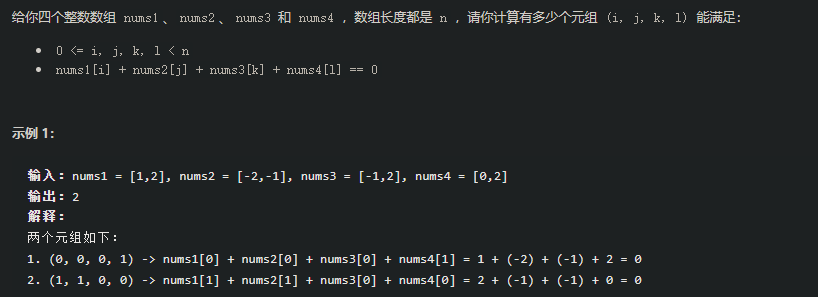

In [11]:
# 两两分组，将前两个的结果加入到hashmao中，遍历后面两个看有没有在hashmap中的
def lc454(nums1,nums2,nums3,nums4):
    res = 0
    seen_num = set()
    dic = {}
    # 先添加两个到hash表，在从两个里面减去，时间复杂度是O(n^2)

    for n1 in nums1:
        for n2 in nums2:
            if n1+n2 not in seen_num:
                seen_num.add(n1+n2)
            dic[n1+n2] = dic.get(n1+n2,0) + 1

    for n3 in nums3:
        for n4 in nums4:
            if -n3-n4 in seen_num:
                res += dic[-n3-n4]
    return res

nums1 = [1,2]; nums2 = [-2,-1]; nums3 = [-1,2]; nums4 = [0,2]
lc454(nums1,nums2,nums3,nums4)

2

### LC. 15 [三数之和](https://leetcode.cn/problems/3sum/)
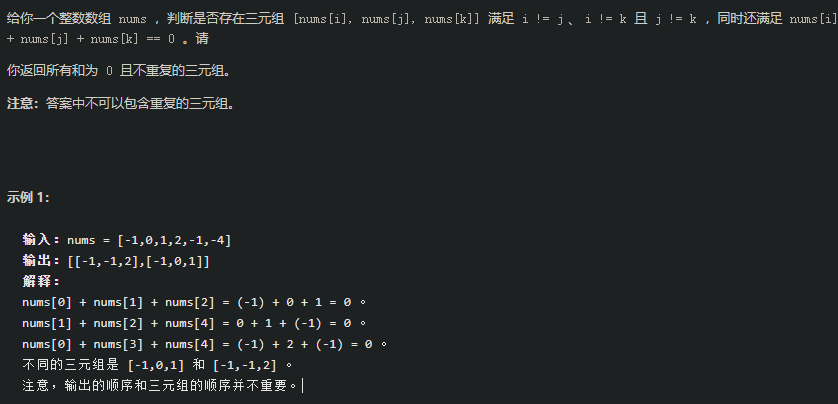

In [14]:
# 双指针，哈希表都可以做到O(n^2),只要注意去重就OK
def lc15(nums):
    nums.sort()
    res = []
    i = 0
    while i < len(nums)-1:
        # 重复的不要
        while i>0 and i< len(nums)-1 and nums[i] == nums[i-1]:
            i += 1
        s,e = i+1,len(nums)-1
        while s<e:
            if nums[i] + nums[s] + nums[e] == 0:
                res.append([nums[i],nums[s],nums[e]])
                # 每次找到符号要求的要把相同的移除
                while s+1<e and nums[s+1] == nums[s]:
                    s += 1
                s += 1
                while e-1>s and nums[e-1] == nums[e]:
                    e -= 1
                e -= 1

            if nums[i] + nums[s] + nums[e] > 0:
                while e-1>s and nums[e-1] == nums[e]:
                    e -= 1
                e -= 1

            if nums[i] + nums[s] + nums[e] < 0:
                while s+1<e and nums[s+1] == nums[s]:
                    s += 1
                s += 1
        i += 1
    return res
lc15([-1,0,1,2,-1,-4])

[[-1, -1, 2], [-1, 0, 1]]

### LC. 18 [四数之和](https://leetcode.cn/problems/4sum/)
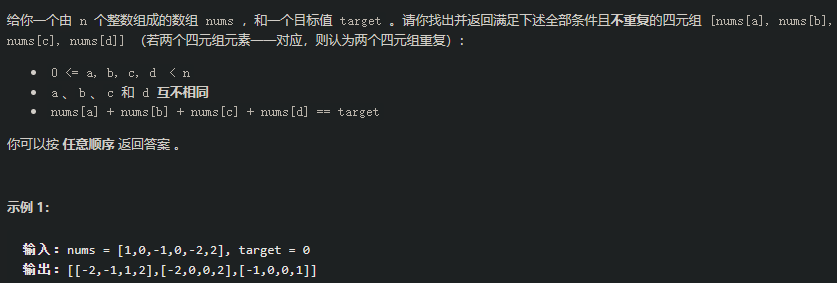

In [16]:
# 在三数之和加上了一维
# 注意和四数之和‖的区别，哪一个是将四个数分别用四个数组存储
def lc18(nums,target):
    nums.sort()
    res = []
    # 三数之和基础上在加上一层
    for i in range(len(nums)-3):
        if i>0 and nums[i]==nums[i-1]:continue  # 最外层去重

        for j in range(i+1,len(nums)-2):
            if j>i+1 and nums[j]==nums[j-1]:continue

            s,e = j+1,len(nums)-1
            while s<e:

                if nums[i] + nums[j] + nums[s] + nums[e] == target:
                    res.append([nums[i],nums[j],nums[s],nums[e]])
                    # 内层去重
                    while s+1<e and nums[s+1]==nums[s]:
                        s += 1
                    s += 1

                    while e-1>s and nums[e-1]==nums[e]:
                        e -= 1
                    e -= 1

                if nums[i] + nums[j] + nums[s] + nums[e] < target:
                    while s+1<e and nums[s+1]==nums[s]:
                        s += 1
                    s += 1

                if nums[i] + nums[j] + nums[s] + nums[e] > target:
                    while e-1>s and nums[e-1]==nums[e]:
                        e -= 1
                    e -= 1
    return res
    
lc18([1,0,-1,0,-2,2],0)

[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]